In [104]:
import json
import numpy as np
import pandas as pd
import folium
import matplotlib.pyplot as plt

In [2]:
bus_routes = json.load(open('data/bus_routes.json', 'r'))
bus_routes[0]

{u'@context': u'http://vocab.odpt.org/context_odpt_BusroutePattern.jsonld',
 u'@id': u'urn:ucode:_00001C000000000000010000031545B8',
 u'@type': u'odpt:BusroutePattern',
 u'dc:date': u'2017-12-07T12:33:51+09:00',
 u'dc:title': u'\u65b0\u5c0f\uff12\uff11',
 u'odpt:busLocationURL': u'https://tobus.jp/sp/blsys/stop?routecode=60&ud=1',
 u'odpt:busroute': u'odpt.Busroute:Toei.Shinko21',
 u'odpt:busstopPoleOrder': [{u'odpt:busstopPole': u'odpt.BusstopPole:Toei.Higashikomatsugawashakomae.2251.2',
   u'odpt:index': 1,
   u'odpt:note': u'\u6771\u5c0f\u677e\u5ddd\u8eca\u5eab\u524d:2251:\u6771\u5c0f\u677e\u5ddd\u8eca\u5eab\u524d2'},
  {u'odpt:busstopPole': u'odpt.BusstopPole:Toei.Funaboriekimae.2032.3',
   u'odpt:index': 2,
   u'odpt:note': u'\u8239\u5800\u99c5\u524d:2032:\u8239\u5800\u99c5\u524d3'}],
 u'odpt:direction': u'1',
 u'odpt:kana': u'\u3057\u3093\u3053\u3001\u306b\u3058\u3085\u3046\u3044\u3061',
 u'odpt:note': u'\u65b0\u5c0f\uff12\uff11:\u65b0\u5c0f\uff12\uff11\u51fa\u5165\uff0d\uff11:68

In [4]:
bus_stops = json.load(open('data/bus_stops.json', 'r'))

In [9]:

bs_df = pd.DataFrame.from_dict(bus_stops, orient='index')
bs_df.head()

,odpt:busLocationURL,odpt:busstopPoleTimetable,odpt:operator,geo:long,dc:title,@id,geo:lat,ug:region,owl:sameAs,odpt:kana,dc:date,odpt:busroutePattern,@context,odpt:busstopPoleNumber,odpt:note,@type
odpt.BusstopPole:Toei.Adachidaigochuugakkoumae.2151.1,[https://tobus.jp/sp/blsys/stop?stopid=2151&ud...,[odpt.BusstopPoleTimetable:Toei.Ou40Kou.Adachi...,[odpt.Operator:Toei],139.777082,足立第五中学校前,urn:ucode:_00001C0000000000000100000315B293,35.777258,None,odpt.BusstopPole:Toei.Adachidaigochuugakkoumae...,あだちだいごちゅうがっこうまえ,2017-12-21T13:36:18+09:00,"[odpt.BusroutePattern:Toei.Ou40Kou.40001.1, od...",http://vocab.odpt.org/context_odpt_BusstopPole...,1,足立第五中学校前:2151,odpt:BusstopPole
odpt.BusstopPole:Toei.Adachidaigochuugakkoumae.2151.2,[https://tobus.jp/sp/blsys/stop?stopid=2151&ud...,[odpt.BusstopPoleTimetable:Toei.Ou40Kou.Adachi...,[odpt.Operator:Toei],139.775743,足立第五中学校前,urn:ucode:_00001C0000000000000100000315B294,35.776389,None,odpt.BusstopPole:Toei.Adachidaigochuugakkoumae...,あだちだいごちゅうがっこうまえ,2017-12-21T13:36:18+09:00,"[odpt.BusroutePattern:Toei.Ou40Kou.40001.2, od...",http://vocab.odpt.org/context_odpt_BusstopPole...,2,足立第五中学校前:2151,odpt:BusstopPole
odpt.BusstopPole:Toei.Adachikuyakusho.2330.2,[https://tobus.jp/sp/blsys/stop?stopid=2330&ud...,[odpt.BusstopPoleTimetable:Toei.Ou49.Adachikuy...,[odpt.Operator:Toei],139.803908,足立区役所,urn:ucode:_00001C0000000000000100000315BEF7,35.775344,None,odpt.BusstopPole:Toei.Adachikuyakusho.2330.2,あだちくやくしょ,2017-12-21T13:36:18+09:00,"[odpt.BusroutePattern:Toei.Ou49.48502.1, odpt....",http://vocab.odpt.org/context_odpt_BusstopPole...,2,足立区役所:2330,odpt:BusstopPole
odpt.BusstopPole:Toei.Adachikuyakusho.2330.3,[https://tobus.jp/sp/blsys/stop?stopid=2330&ud...,[odpt.BusstopPoleTimetable:Toei.Kusa43.Adachik...,[odpt.Operator:Toei],139.803682,足立区役所,urn:ucode:_00001C0000000000000100000315BEF8,35.775117,None,odpt.BusstopPole:Toei.Adachikuyakusho.2330.3,あだちくやくしょ,2017-12-21T13:36:18+09:00,"[odpt.BusroutePattern:Toei.Kita47.48105.2, odp...",http://vocab.odpt.org/context_odpt_BusstopPole...,3,足立区役所:2330,odpt:BusstopPole
odpt.BusstopPole:Toei.Adachikuyakusho.2330.4,[https://tobus.jp/sp/blsys/stop?stopid=2330&ud...,[odpt.BusstopPoleTimetable:Toei.Kita47.Adachik...,[odpt.Operator:Toei],139.804094,足立区役所,urn:ucode:_00001C0000000000000100000315BEF9,35.775212,None,odpt.BusstopPole:Toei.Adachikuyakusho.2330.4,あだちくやくしょ,2017-12-21T13:36:18+09:00,"[odpt.BusroutePattern:Toei.Kita47.48102.1, odp...",http://vocab.odpt.org/context_odpt_BusstopPole...,4,足立区役所:2330,odpt:BusstopPole


In [27]:
def search_stops(targets, route, start_station=False):
    bs_ids = [s['odpt:busstopPole'] for s in route['odpt:busstopPoleOrder']]
    for i, bs_id in enumerate(bs_ids):
        if bs_id in targets:
            return bs_ids[i:]
        if start_station:
            return []
    return []

def find_routes(df, bus_routes, lat_min, lat_max, lon_min, lon_max, start_station=False):
    near_busstops = df[
        (df['geo:lat'] > lat_min) & (df['geo:lat'] < lat_max) & 
        (df['geo:long'] > lon_min) & (df['geo:long'] < lon_max)
    ].index
    route_shapes = {}
    for route in bus_routes:
        shape = []
        for bs_id in search_stops(near_busstops, route, start_station):
            stop = bus_stops[bs_id] 
            shape.append([stop['geo:lat'], stop['geo:long']])
        if len(shape) > 1:
            route_shapes[route['owl:sameAs']] = shape
    return route_shapes

In [28]:
lat_min, lon_min = 35.66 - 0.01, 139.70 - 0.01
lat_max, lon_max = 35.66 + 0.01, 139.70 + 0.01
route_shapes = find_routes(bs_df, bus_routes, lat_min, lat_max, lon_min, lon_max, True)

In [29]:
def plot_shapes(shapes, c='red'):
    for shape in shapes:
        for point in shape:
            folium.CircleMarker(point, color=c, fill_color=c, radius=5, fill_opacity=0.8).add_to(mapp)
        folium.PolyLine(shape, color=c, weight=5, opacity=0.5).add_to(mapp)
        

center = route_shapes.values()[0][0]
mapp = folium.Map(location=center, zoom_start=17)
plot_shapes(route_shapes.values()[:1])
mapp

In [31]:
route_name, _ = route_shapes.items()[0]
query = 'SELECT * FROM bus.bus WHERE busroutePattern="{}"'.format(route_name)

df = pd.read_gbq(query, 'tokyo-odpt')

In [35]:
df.to_csv('sample_bus.csv')

In [37]:
df.columns

Index([u'date', u'valid', u'busroute', u'busroutePattern', u'busNumber',
       u'operator', u'startingBusstopPole', u'terminalBusstopPole',
       u'fromBusstopPole', u'toBusstopPole', u'fromBusstopPoleTime', u'lat',
       u'long', u'azimuth', u'doorStatus', u'progress', u'speed'],
      dtype='object')

In [121]:
from pytz import timezone
tz = timezone("Asia/Tokyo")

In [123]:
usecols = ['date', 'busNumber', 'fromBusstopPole', 'toBusstopPole', 'fromBusstopPoleTime']
df = df[usecols].sort_values('date')
df['date'] = df.date.apply(lambda x: tz.fromutc(x))
df['fromBusstopPoleTime'] = df.fromBusstopPoleTime.apply(lambda x: tz.fromutc(x))
df.head()

,date,busNumber,fromBusstopPole,toBusstopPole,fromBusstopPoleTime
19815,2017-12-18 15:47:17+09:00,L664,odpt.BusstopPole:Toei.Shibuyaekimae.636.7,odpt.BusstopPole:Toei.Seibuhyakkatemmae.794.1,2017-12-18 06:47:05+09:00
19820,2017-12-18 15:47:17+09:00,L664,odpt.BusstopPole:Toei.Shibuyaekimae.636.7,odpt.BusstopPole:Toei.Seibuhyakkatemmae.794.1,2017-12-18 06:47:05+09:00
19812,2017-12-18 15:47:53+09:00,L664,odpt.BusstopPole:Toei.Shibuyaekimae.636.7,odpt.BusstopPole:Toei.Seibuhyakkatemmae.794.1,2017-12-18 06:47:05+09:00
19813,2017-12-18 15:47:53+09:00,L664,odpt.BusstopPole:Toei.Shibuyaekimae.636.7,odpt.BusstopPole:Toei.Seibuhyakkatemmae.794.1,2017-12-18 06:47:05+09:00
19819,2017-12-18 15:48:31+09:00,L664,odpt.BusstopPole:Toei.Shibuyaekimae.636.7,odpt.BusstopPole:Toei.Seibuhyakkatemmae.794.1,2017-12-18 06:47:05+09:00


In [124]:
import datetime
date_df = df.groupby(['busNumber', 'fromBusstopPoleTime', 'fromBusstopPole', 'toBusstopPole']).agg({'date' :[min, max]})
# date_df = date_df.reset_index().sort_values('fromBusstopPoleTime')
date_df.head(5)

date  \
                                                                                                                                                         min   
busNumber fromBusstopPoleTime       fromBusstopPole                                    toBusstopPole                                                           
A595      2017-12-20 19:00:41+09:00 odpt.BusstopPole:Toei.Shinkokuritsugekijoumae.1... odpt.BusstopPole:Toei.Hatashiro.1223.1      2017-12-21 04:01:07+09:00   
          2017-12-20 19:01:59+09:00 odpt.BusstopPole:Toei.Hatashiro.1223.1             odpt.BusstopPole:Toei.Hatagayaekimae.1219.1 2017-12-21 04:02:37+09:00   
          2017-12-20 19:03:24+09:00 odpt.BusstopPole:Toei.Hatagayaharamachi.1220.1     odpt.BusstopPole:Toei.Sasadukaekimae.572.2  2017-12-21 04:03:56+09:00   
          2017-12-20 19:06:50+09:00 odpt.BusstopPole:Toei.Sasadukanichoume.573.2       odpt.BusstopPole:Toei.Daitabashi.914.1      2017-12-21 04:10:13+09:00   
          2017-12-20 19:10:20+09:00 odpt.BusstopPole:Toei.Daitabashi.914.1             odpt.BusstopPole:Toei.Izumiicchoume.98.1    2017-12-21 04:10:52+09:00   

                                                                                                                                                              
                                                                                                                                                         max  
busNumber fromBusstopPoleTime       fromBusstopPole                                    toBusstopPole                                                          
A595      2017-12-20 19:00:41+09:00 odpt.BusstopPole:Toei.Shinkokuritsugekijoumae.1... odpt.BusstopPole:Toei.Hatashiro.1223.1      2017-12-21 04:01:07+09:00  
          2017-12-20 19:01:59+09:00 odpt.BusstopPole:Toei.Hatashiro.1223.1             odpt.BusstopPole:Toei.Hatagayaekimae.1219.1 2017-12-21 04:02:37+09:00  
          2017-12-20 19:03:24+09:00 odpt.BusstopPole:Toei.Hatagayaharamachi.1220.1     odpt.BusstopPole:Toei.Sasadukaekimae.572.2  2017-12-21 04:05:13+09:00  
          2017-12-20 19:06:50+09:00 odpt.BusstopPole:Toei.Sasadukanichoume.573.2       odpt.BusstopPole:Toei.Daitabashi.914.1      2017-12-21 04:10:13+09:00  
          2017-12-20 19:10:20+09:00 odpt.BusstopPole:Toei.Daitabashi.914.1             odpt.BusstopPole:Toei.Izumiicchoume.98.1    2017-12-21 04:10:52+09:00

In [125]:
date_df = date_df.reset_index()
date_df['nextBusstopPole'] = date_df.fromBusstopPole.values.tolist()[1:] + [None]
t = date_df.fromBusstopPoleTime.values
date_df['nextBusstopPoleDuration'] = map(lambda x: x / np.timedelta64(1, 's'), t[1:] - t[:-1]) + [None]
date_df.head()

busNumber       fromBusstopPoleTime  \
                                        
0      A595 2017-12-20 19:00:41+09:00   
1      A595 2017-12-20 19:01:59+09:00   
2      A595 2017-12-20 19:03:24+09:00   
3      A595 2017-12-20 19:06:50+09:00   
4      A595 2017-12-20 19:10:20+09:00   

                                     fromBusstopPole  \
                                                       
0  odpt.BusstopPole:Toei.Shinkokuritsugekijoumae....   
1             odpt.BusstopPole:Toei.Hatashiro.1223.1   
2     odpt.BusstopPole:Toei.Hatagayaharamachi.1220.1   
3       odpt.BusstopPole:Toei.Sasadukanichoume.573.2   
4             odpt.BusstopPole:Toei.Daitabashi.914.1   

                                 toBusstopPole                      date  \
                                                                     min   
0       odpt.BusstopPole:Toei.Hatashiro.1223.1 2017-12-21 04:01:07+09:00   
1  odpt.BusstopPole:Toei.Hatagayaekimae.1219.1 2017-12-21 04:02:37+09:00   
2   odpt.BusstopPole:Toei.Sasadukaekimae.572.2 2017-12-21 04:03:56+09:00   
3       odpt.BusstopPole:Toei.Daitabashi.914.1 2017-12-21 04:10:13+09:00   
4     odpt.BusstopPole:Toei.Izumiicchoume.98.1 2017-12-21 04:10:52+09:00   

                                                            nextBusstopPole  \
                        max                                                   
0 2017-12-21 04:01:07+09:00          odpt.BusstopPole:Toei.Hatashiro.1223.1   
1 2017-12-21 04:02:37+09:00  odpt.BusstopPole:Toei.Hatagayaharamachi.1220.1   
2 2017-12-21 04:05:13+09:00    odpt.BusstopPole:Toei.Sasadukanichoume.573.2   
3 2017-12-21 04:10:13+09:00          odpt.BusstopPole:Toei.Daitabashi.914.1   
4 2017-12-21 04:10:52+09:00        odpt.BusstopPole:Toei.Izumiicchoume.98.1   

  nextBusstopPoleDuration  
                           
0                    78.0  
1                    85.0  
2                   206.0  
3                   210.0  
4                    64.0

In [126]:
date_df.fromBusstopPoleTime.iloc[0].hour
date_df['hour'] = [x.hour for x in date_df.fromBusstopPoleTime]
date_df['dayofweek'] = [x.weekday() for x in date_df.fromBusstopPoleTime]

In [127]:
from_stop = 'odpt.BusstopPole:Toei.Sasadukanichoume.573.2'
to_stop = 'odpt.BusstopPole:Toei.Daitabashi.914.1'
df_ = date_df[(date_df.fromBusstopPole==from_stop) & (date_df.nextBusstopPole==to_stop)]
df_.head()

busNumber       fromBusstopPoleTime  \
                                          
3        A595 2017-12-20 19:06:50+09:00   
35       A595 2017-12-21 12:47:04+09:00   
66       A595 2017-12-21 15:00:13+09:00   
97       A595 2017-12-21 17:39:17+09:00   
129      A595 2017-12-21 19:58:42+09:00   

                                  fromBusstopPole  \
                                                    
3    odpt.BusstopPole:Toei.Sasadukanichoume.573.2   
35   odpt.BusstopPole:Toei.Sasadukanichoume.573.2   
66   odpt.BusstopPole:Toei.Sasadukanichoume.573.2   
97   odpt.BusstopPole:Toei.Sasadukanichoume.573.2   
129  odpt.BusstopPole:Toei.Sasadukanichoume.573.2   

                              toBusstopPole                      date  \
                                                                  min   
3    odpt.BusstopPole:Toei.Daitabashi.914.1 2017-12-21 04:10:13+09:00   
35   odpt.BusstopPole:Toei.Daitabashi.914.1 2017-12-21 21:47:38+09:00   
66   odpt.BusstopPole:Toei.Daitabashi.914.1 2017-12-22 00:00:55+09:00   
97   odpt.BusstopPole:Toei.Daitabashi.914.1 2017-12-22 02:39:31+09:00   
129  odpt.BusstopPole:Toei.Daitabashi.914.1 2017-12-22 04:58:48+09:00   

                                                      nextBusstopPole  \
                          max                                           
3   2017-12-21 04:10:13+09:00  odpt.BusstopPole:Toei.Daitabashi.914.1   
35  2017-12-21 21:52:56+09:00  odpt.BusstopPole:Toei.Daitabashi.914.1   
66  2017-12-22 00:06:48+09:00  odpt.BusstopPole:Toei.Daitabashi.914.1   
97  2017-12-22 02:48:14+09:00  odpt.BusstopPole:Toei.Daitabashi.914.1   
129 2017-12-22 05:04:45+09:00  odpt.BusstopPole:Toei.Daitabashi.914.1   

    nextBusstopPoleDuration hour dayofweek  
                                            
3                     210.0   19         2  
35                    374.0   12         3  
66                    403.0   15         3  
97                    542.0   17         3  
129                   386.0   19         3

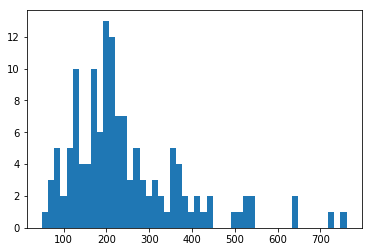

In [128]:
plt.hist(df_.nextBusstopPoleDuration, bins=50);

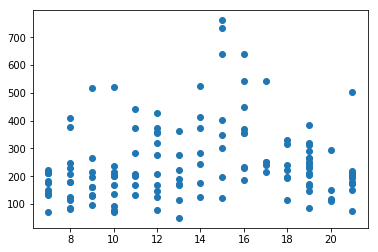

In [130]:
plt.scatter(df_.hour, df_.nextBusstopPoleDuration);

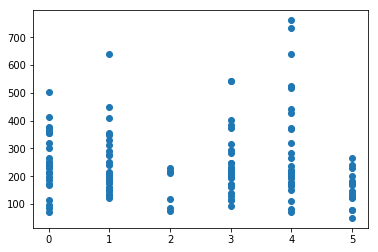

In [132]:
plt.scatter(df_.dayofweek, df_.nextBusstopPoleDuration);